In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
airbnb = pd.read_csv('listings.csv', encoding='latin1')

In [3]:
airbnb.shape

(4325, 17)

In [4]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [5]:
airbnb.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                              782
minimum_nights                       0
number_of_reviews                    0
last_review                        999
reviews_per_month                  999
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1533
dtype: int64

# Predict Price using Random Forest

#### Preprocess

In [6]:
airbnb['price'] = pd.to_numeric(airbnb['price'], errors='coerce')

In [7]:
# Drop unnecessary columns for prediction
airbnb_filtered = airbnb.drop(columns=['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'last_review', 'license'])

In [8]:
# Handle categorical variables using one-hot encoding
airbnb_filtered = pd.get_dummies(airbnb_filtered, drop_first=True)
airbnb_filtered

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,42.364130,-71.029910,125.0,29,25,0.23,1,317,1,0,0,0
1,42.328440,-71.095810,139.0,3,123,0.66,10,112,5,0,0,0
2,42.328020,-71.093870,179.0,3,128,0.71,10,79,4,0,0,0
3,42.358670,-71.063070,92.0,91,29,0.24,8,101,3,0,0,0
4,42.351730,-71.086850,130.0,91,9,0.09,13,364,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4320,42.339042,-71.080357,169.0,2,0,NaN,10,32,0,0,0,0
4321,42.339042,-71.080357,217.0,2,0,NaN,10,159,0,0,0,0
4322,42.339042,-71.080357,213.0,2,0,NaN,10,158,0,0,0,0
4323,42.345838,-71.064972,250.0,1,0,NaN,6,46,0,0,0,0


In [9]:
# Separate rows with and without missing prices
airbnb_non_missing = airbnb_filtered[airbnb_filtered['price'].notna()]
airbnb_missing = airbnb_filtered[airbnb_filtered['price'].isna()]

In [10]:
# Separate the target variable (price) and features for non-missing data
X = airbnb_non_missing.drop(columns=['price'])
y = airbnb_non_missing['price']

In [11]:
# Handle missing values in the features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [12]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [14]:
# Hyperparameter tuning for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the grid search with RandomForest
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.5s
[

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [15]:
# Use the best model for prediction
best_rf_model = grid_search.best_estimator_

# Predict the missing values in the price column for rows with missing prices
X_missing = airbnb_missing.drop(columns=['price'])
X_missing_imputed = imputer.transform(X_missing)
X_missing_scaled = scaler.transform(X_missing_imputed)
missing_price_predictions = best_rf_model.predict(X_missing_scaled)
missing_price_predictions

array([ 470.46097805,  425.87158494,  470.46097805,  271.9700028 ,
        440.2249659 ,  425.87158494,  712.32386296,  439.92295965,
        438.07295965,  425.87158494,  425.87158494,  425.87158494,
        712.32386296,  438.07295965,  468.88454948,  712.32386296,
        439.92295965,  439.92295965,  425.87158494,  465.22249223,
        425.87158494,  425.87158494,  470.46097805,  426.96024292,
        271.9700028 ,  438.07295965,  439.92295965,  438.07295965,
        425.87158494,  425.87158494,  425.87158494,  472.51559565,
        443.37614058,  438.07295965,  425.87158494,  425.87158494,
        425.87158494,  271.9700028 ,  271.9700028 ,  470.46097805,
        271.9700028 ,  425.87158494,  470.46097805,  438.07295965,
        446.5932414 ,  425.87158494,  425.87158494,  454.70369653,
        271.9700028 ,  425.87158494,  425.87158494,  271.9700028 ,
        271.9700028 ,  478.60752206,  712.79067296,  425.87158494,
        425.87158494,  470.46097805,  271.9700028 ,  271.97000

In [16]:
# Update the original dataset with the predicted prices
airbnb.loc[airbnb['price'].isna(), 'price'] = missing_price_predictions

In [17]:
# Evaluate the model's performance
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

134.4759561706405

# PD

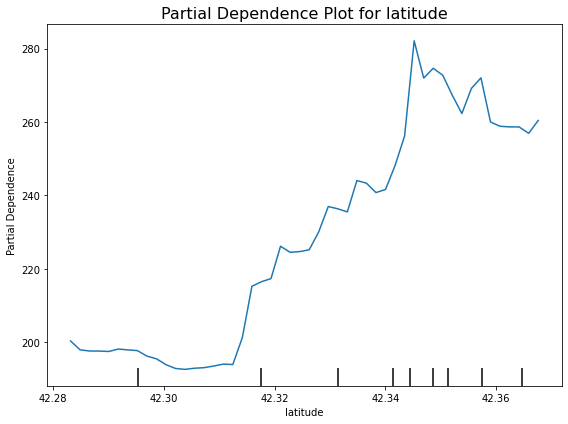

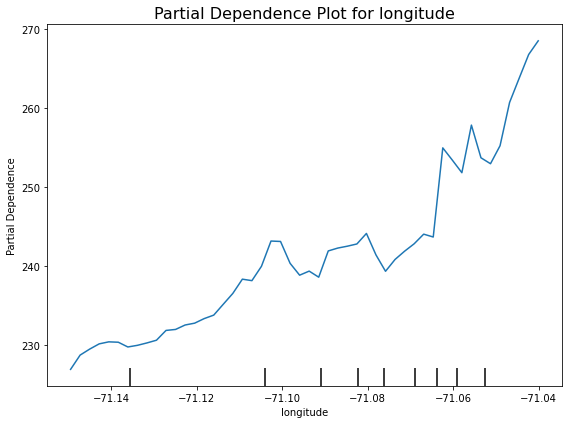

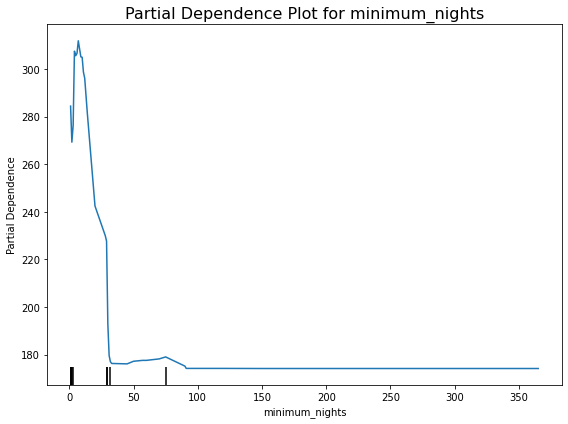

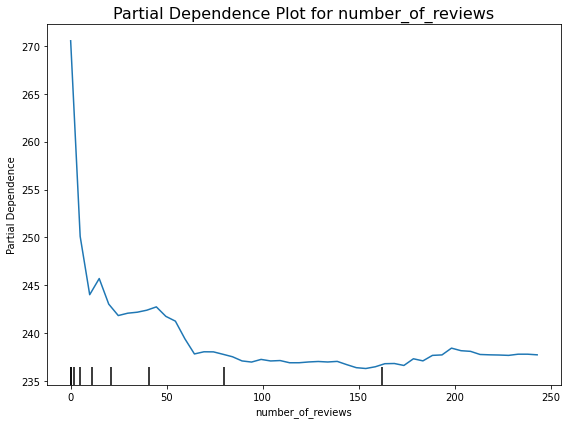

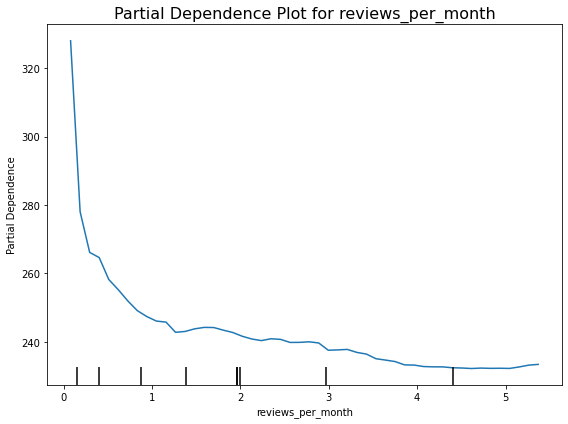

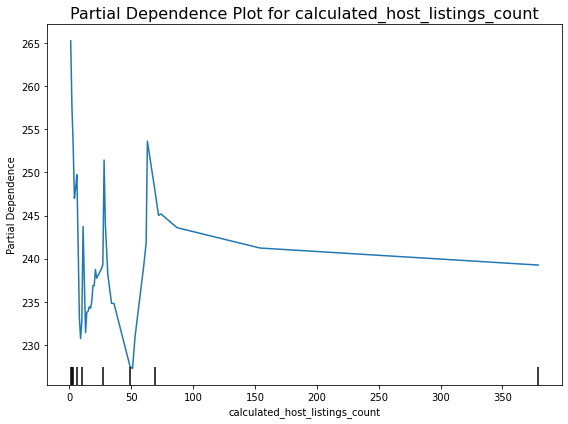

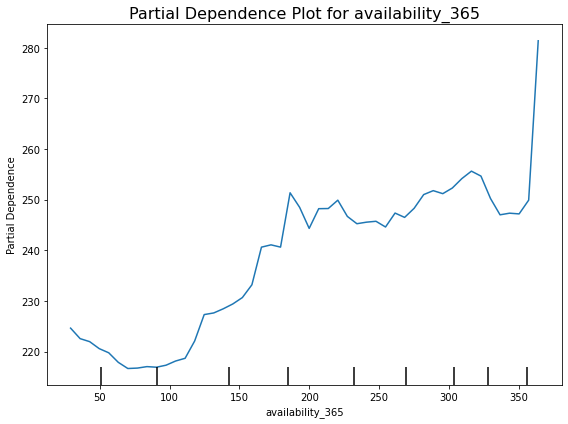

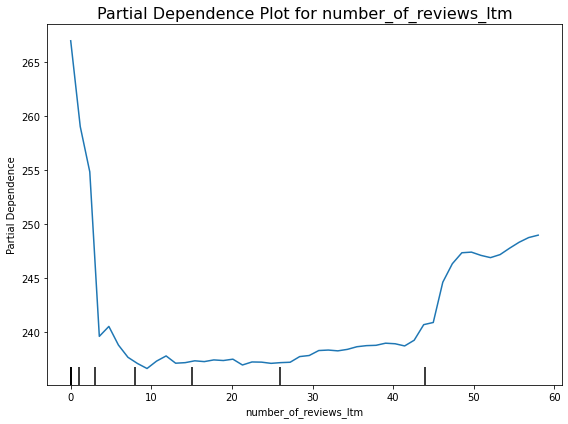

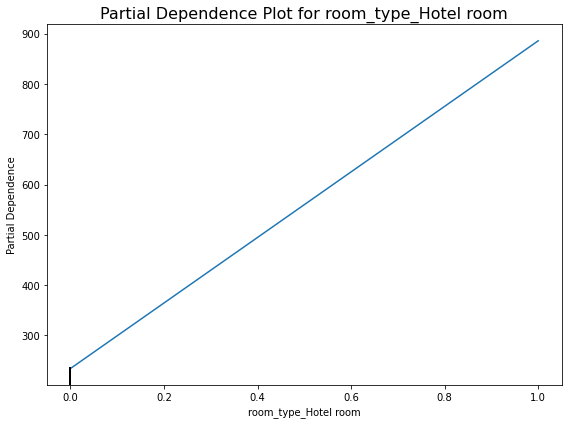

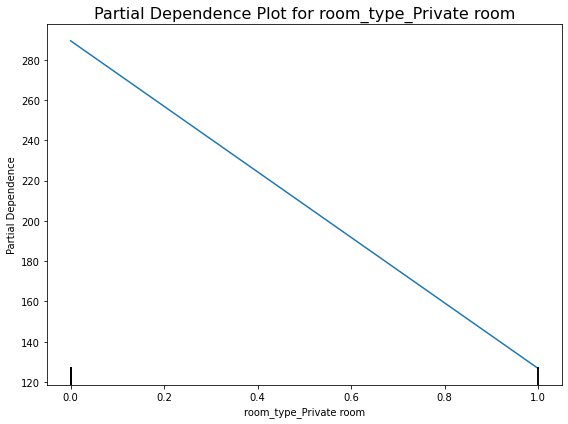

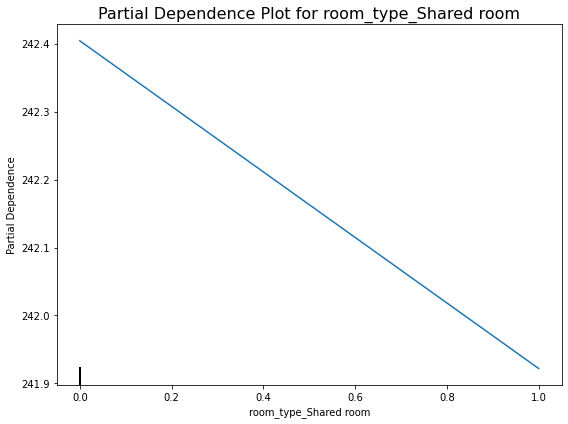

In [31]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Plot partial dependence
features = list(range(X.shape[1]))  # Use all features
feature_names = X.columns.tolist()  # Get feature names

# Plot each feature separately to provide clear labels and titles
for feature, name in zip(features, feature_names):
    fig, ax = plt.subplots(figsize=(8, 6))
    PartialDependenceDisplay.from_estimator(best_rf_model, X_train, [feature], ax=ax, grid_resolution=50)
    plt.title(f'Partial Dependence Plot for {name}', fontsize=16)
    plt.xlabel(name)
    plt.ylabel('Partial Dependence')
    plt.tight_layout()
    plt.show()

# Data Visualization

In [48]:
import matplotlib.image as mpimg
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

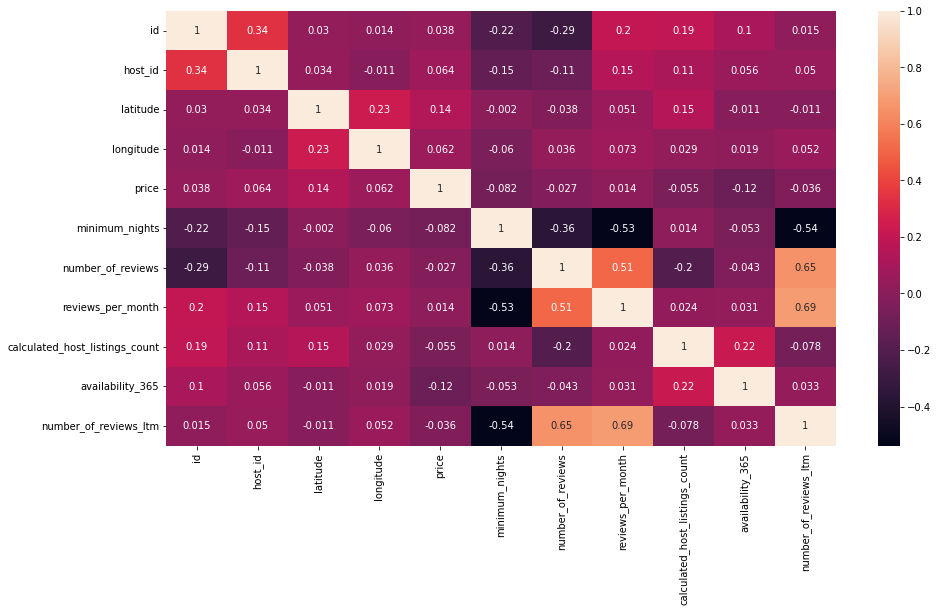

In [49]:
corr = airbnb.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
airbnb.columns

#### Neighbourhood

In [50]:
airbnb['neighbourhood'].unique()

array(['East Boston', 'Roxbury', 'Beacon Hill', 'Back Bay', 'North End',
       'Dorchester', 'Charlestown', 'Jamaica Plain', 'Downtown',
       'South Boston', 'Bay Village', 'Brighton', 'West Roxbury',
       'Roslindale', 'South End', 'Mission Hill', 'Fenway', 'Allston',
       'Hyde Park', 'West End', 'Mattapan', 'Leather District',
       'South Boston Waterfront', 'Chinatown', 'Longwood Medical Area'],
      dtype=object)

Text(0.5, 1.0, 'Neighbourhood')

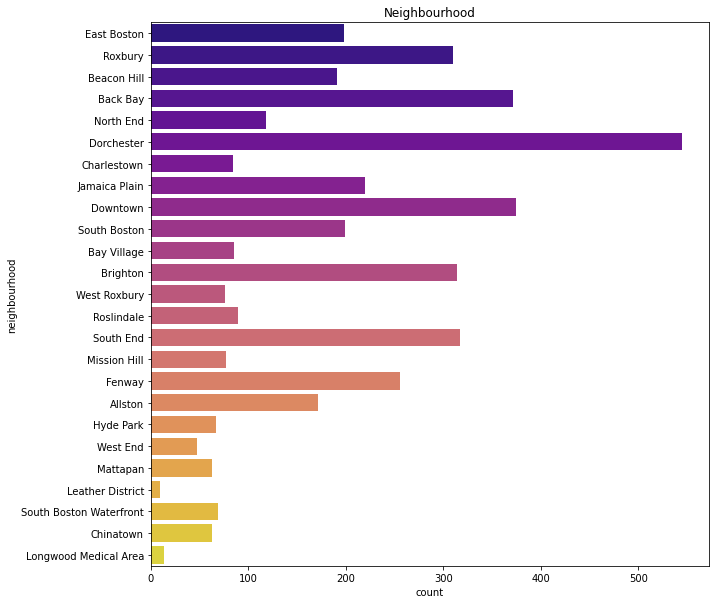

In [51]:
sns.countplot(airbnb['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood')

#### Room type

Text(0.5, 1.0, 'Restaurants delivering online or Not')

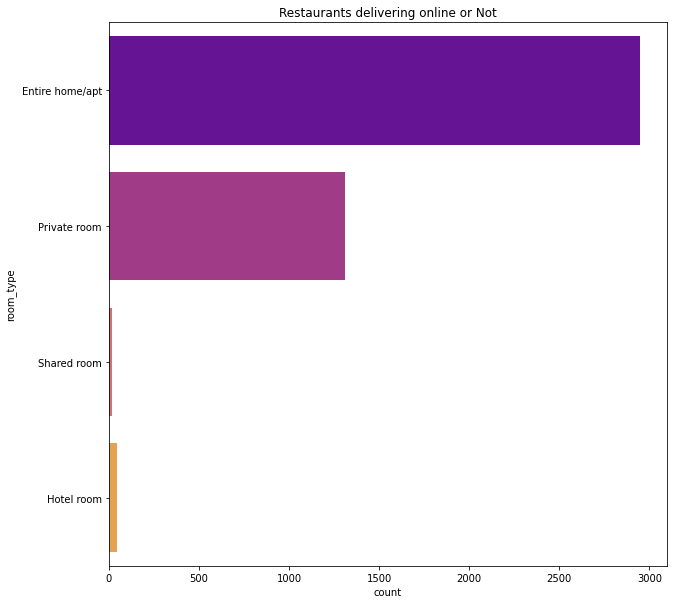

In [52]:
sns.countplot(airbnb['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

#### Relation between neighbourgroup and Availability of Room

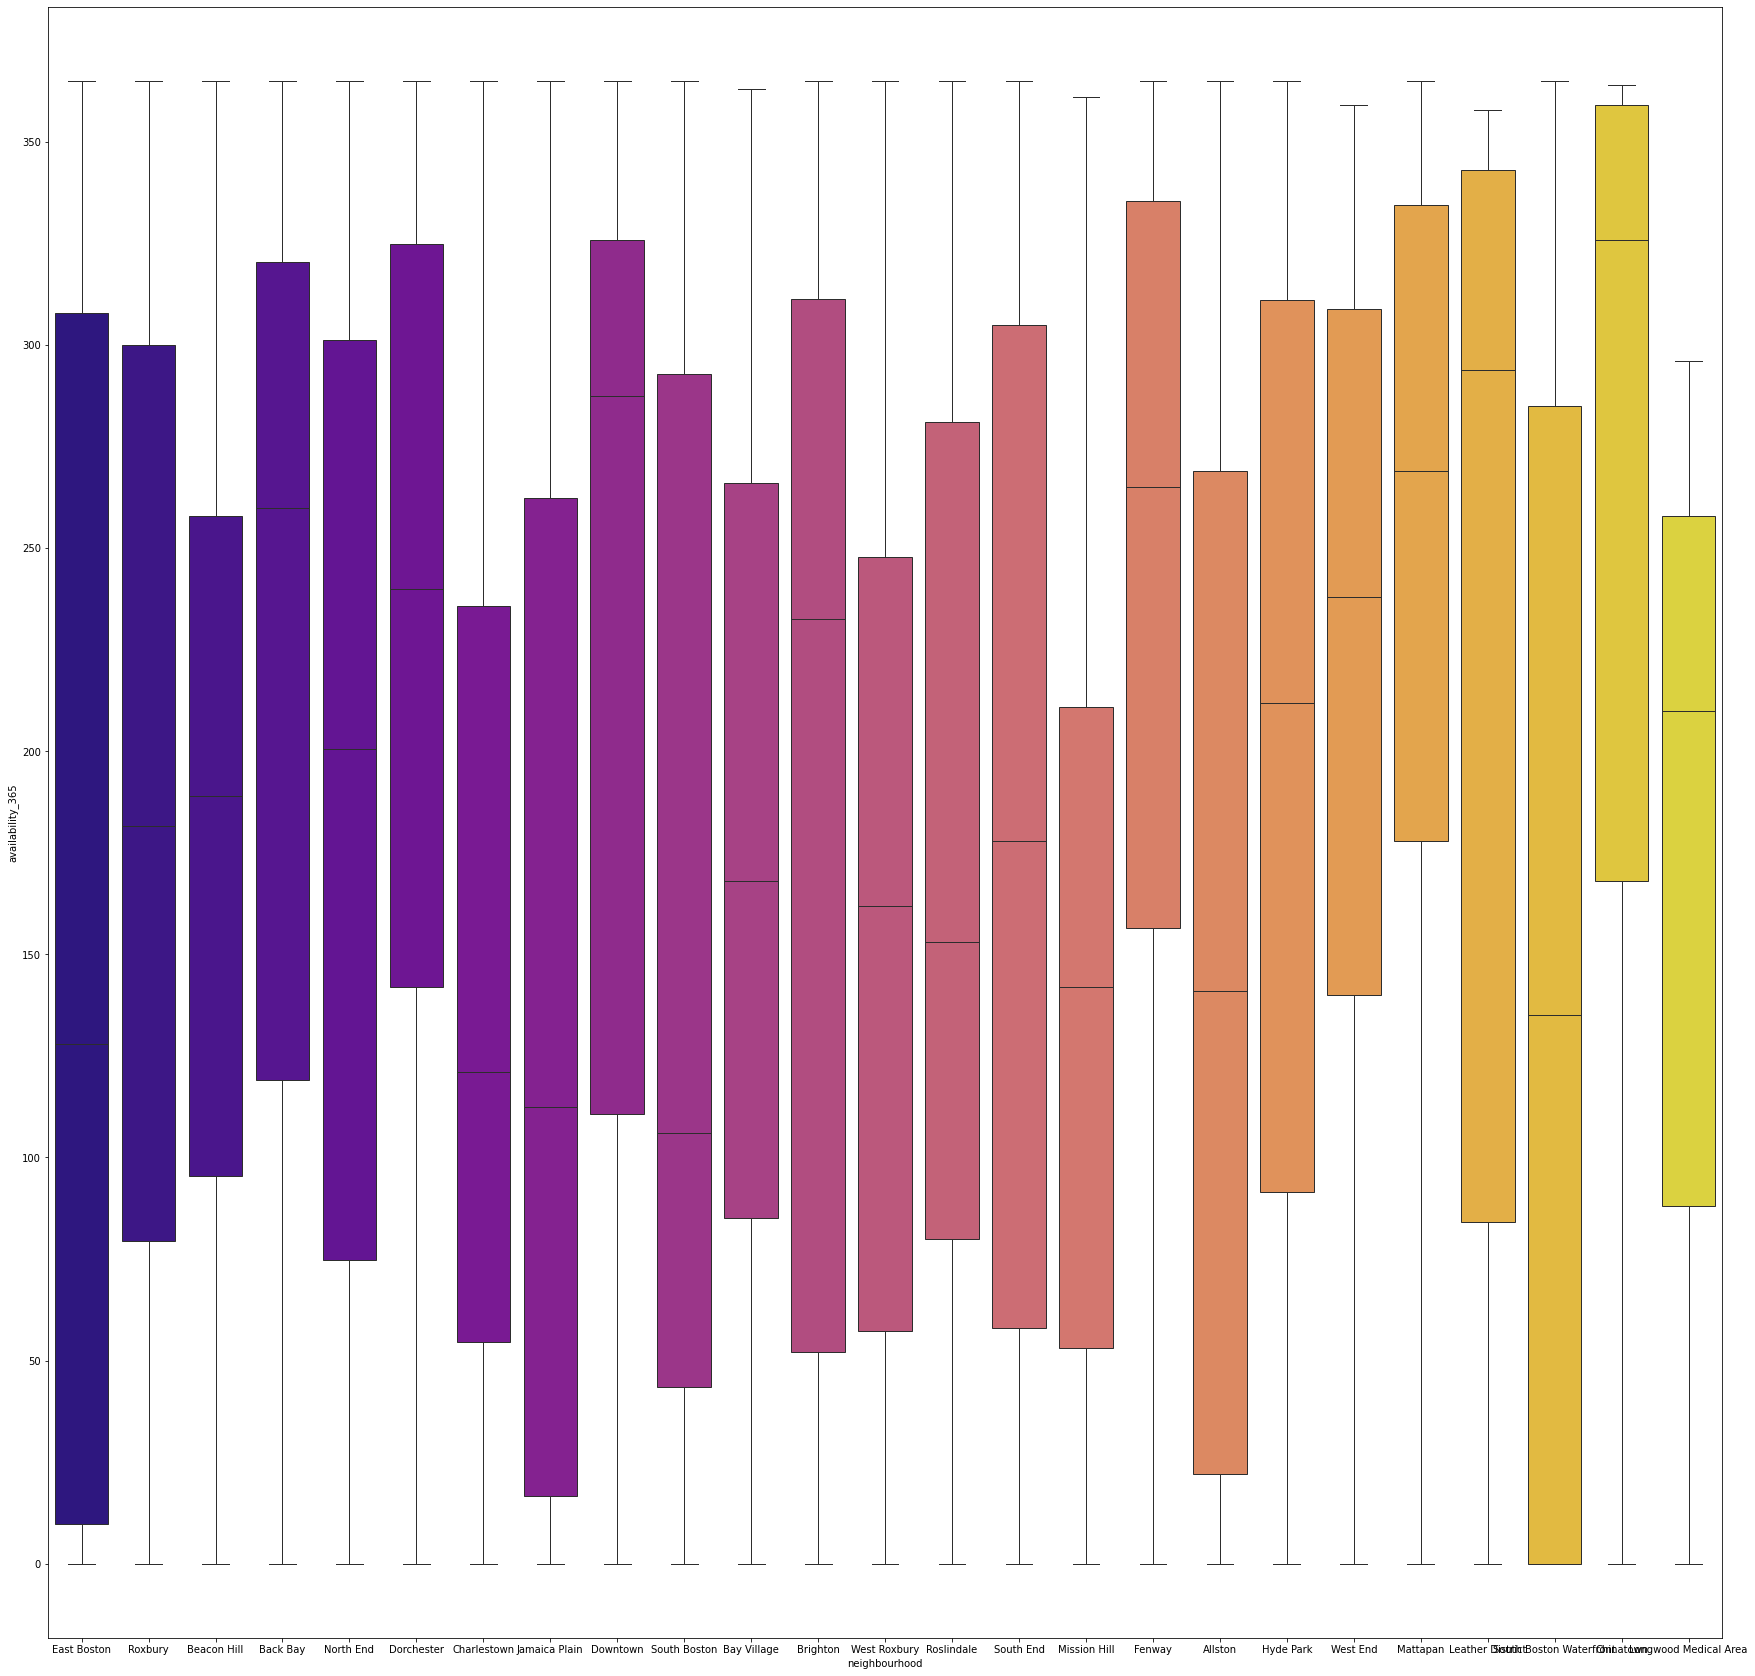

In [54]:
plt.figure(figsize=(30,30))
ax = sns.boxplot(data=airbnb, x='neighbourhood',y='availability_365',palette='plasma')

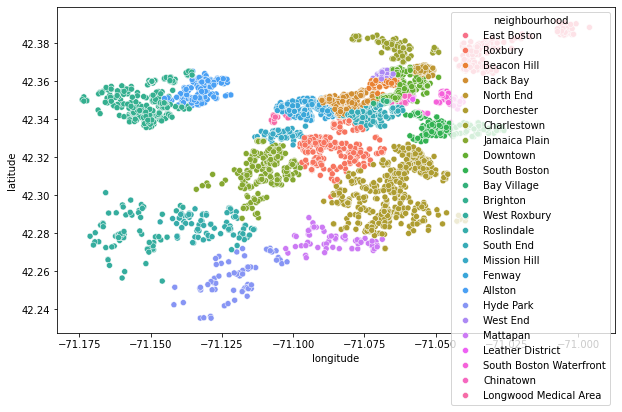

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=airbnb.longitude, y=airbnb.latitude, hue=airbnb.neighbourhood)
plt.show()

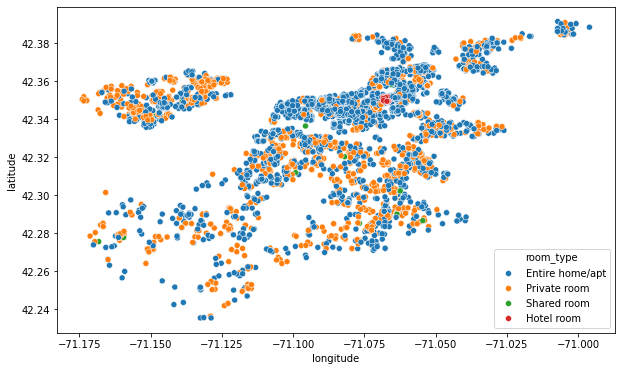

In [59]:
plt.figure(figsize=(10,6))
sns.scatterplot(x= airbnb.longitude,y= airbnb.latitude,hue=airbnb.room_type)
plt.ioff()

# word cloud

In [61]:
from wordcloud import WordCloud

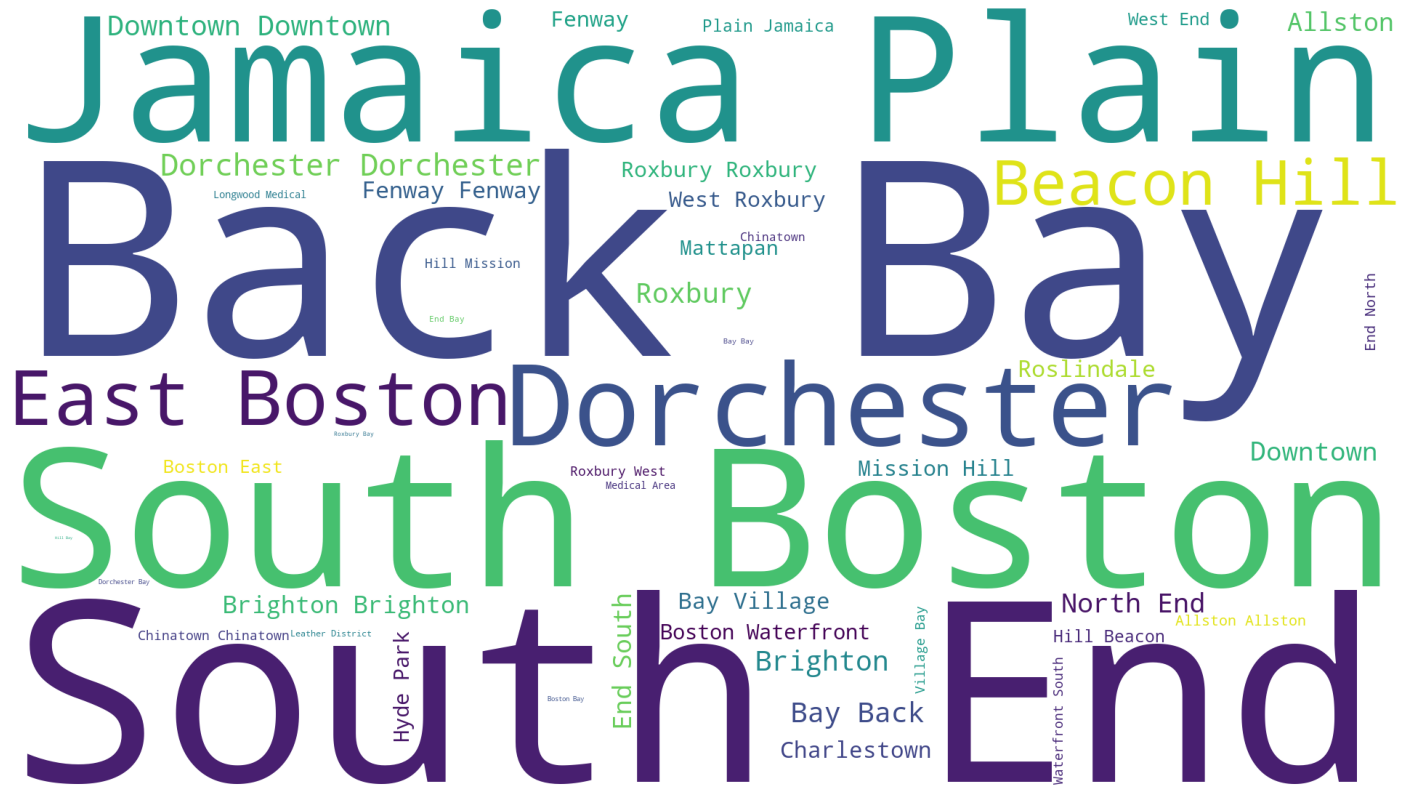

In [62]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(airbnb.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()